# Phase 1 Live Code 2

# I. INTRODUCTION

Hello everyone! Welcome to my notebook.

In this notebook I will be doing an analysis for an assignment. As the author of this notebook, here is my short profile:

* Name : Alexander Prasetyo Christianto
* Age : 23
* Last Education Background : Electrical Engineering
* Occupation : Full Time Data Science Student Batch-001

## About The Data

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

## Objectives

Create machine learning models to classify possible employee attrition.

## II. IMPORT LIBRARIES

This section contains all the libraries that I am going to use throughout this assignment.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import phik
from feature_engine.outliers import Winsorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# III. DATA LOADING

The data that I'm going to analyse is obtained from this [link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?select=WA_Fn-UseC_-HR-Employee-Attrition.csv)

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

And this is the preview of the first and last 5 rows of my data.

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# IV. DATA CLEANING

In this section, I will perform data cleansing before beginning the analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There is no null values in the dataset. All columns contain 1470 rows and there are 35 columns in my dataset.

In [7]:
df.duplicated().sum()

0

Also there is no duplicated entries.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


There is a weird column which is `EmployeeCount`. All the values in it only contains values of 1.

In [9]:
df.loc[df['OverTime'] == 'No', 'OverTime'] = 0
df.loc[df['OverTime'] == 'Yes', 'OverTime'] = 1

In [10]:
df.loc[df['Attrition'] == 'No', 'Attrition'] = 0
df.loc[df['Attrition'] == 'Yes', 'Attrition'] = 1

In [11]:
df['OverTime'] = df.OverTime.astype('int64')
df['Attrition'] = df.OverTime.astype('int64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# V. EXPLORATORY DATA ANALYSIS (EDA)

In this section, I will do an exploratory data analysis of the dataset.

Changing `Attrition` value from 'No' to 0 and 'Yes' to 1

## 5.1 What is the % Attrition in the dataset?

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


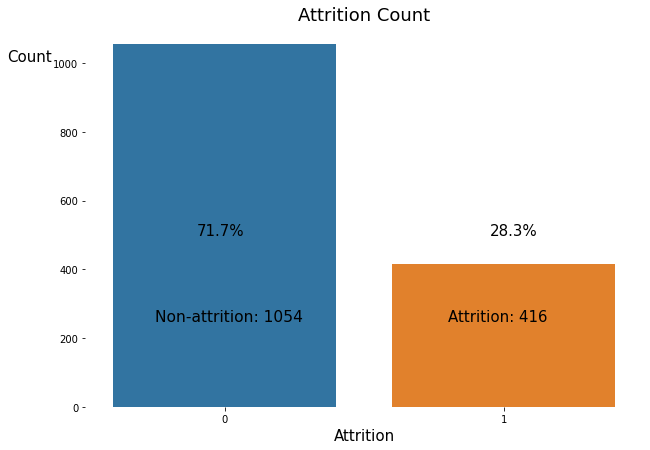

In [14]:
attrition = df['Attrition'].sum()
no_attrition = len(df['Attrition']) - attrition

attrition_perc = round(attrition/len(df['Attrition']) * 100, 1)
no_attrition_perc = round(no_attrition/len(df['Attrition']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('Attrition', data = df)
plt.annotate(f'Non-attrition: {no_attrition}', 
             xy=(-0.25, 250),
            size=15.5)

plt.annotate('Attrition: {}'.format(attrition), 
             xy=(0.8, 250),
            size=15)

plt.annotate('{}%'.format(no_attrition_perc), xy=(-0.1, 500),size=15)
plt.annotate('{}%'.format(attrition_perc), xy=(0.95, 500),size=15)
plt.title('Attrition Count', size=18)
plt.xlabel("Attrition",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)
plt.box(False)

## 5.2 What age has the highest attrition?

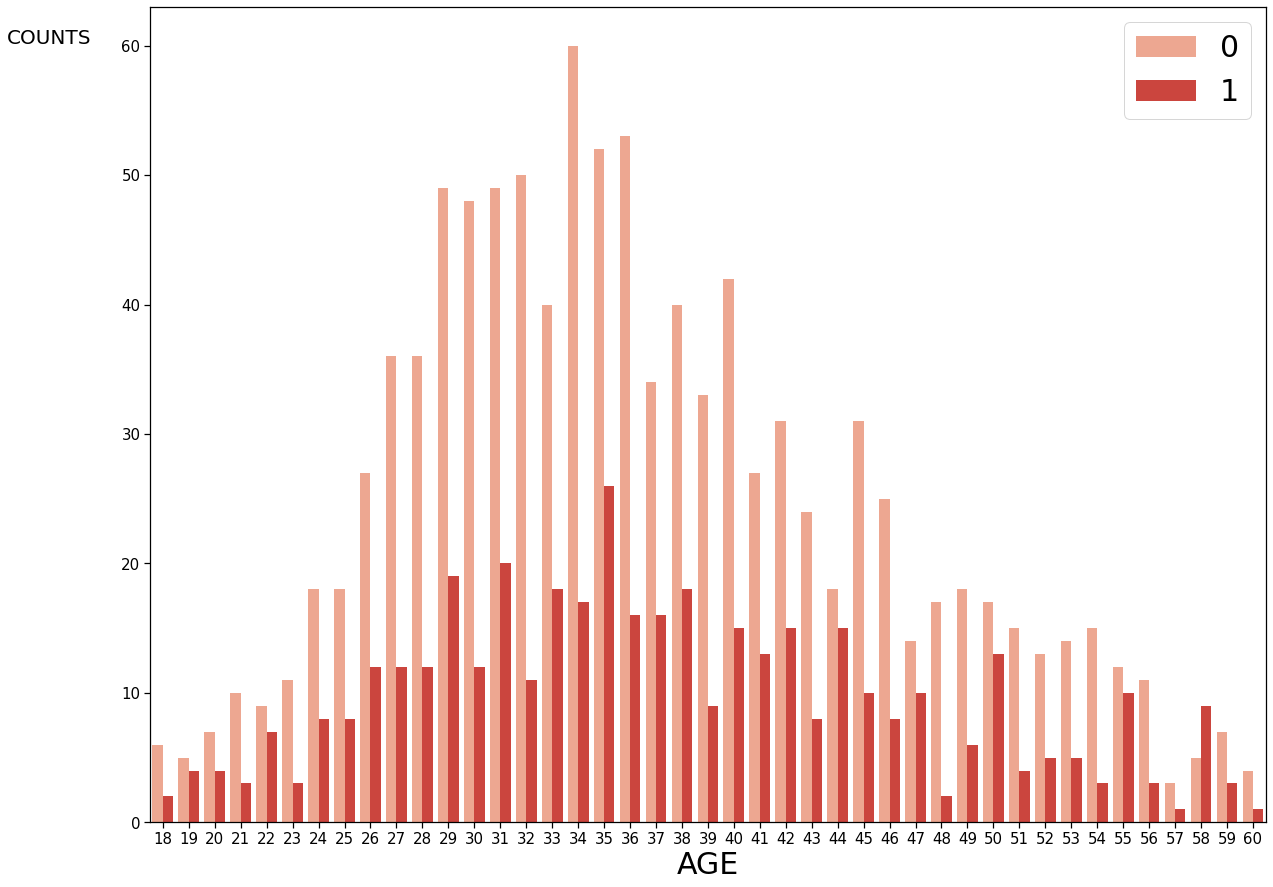

In [15]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='Age', hue='Attrition', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40, size=20)
axz.set_xlabel('AGE', size=30)
axz.yaxis.set_label_coords(-0.09, 0.95)  # (x, y)
axz.legend(loc=1,fontsize=30);

axz.tick_params(labelsize=15)

People who is in age of **29 years old and 31 years old** has the highest count of attrition

## 5.3 Do performance and job satisfaction affect attrition?

In [16]:
new_df = df[['Attrition','JobSatisfaction','PerformanceRating', 'WorkLifeBalance']].copy()

In [17]:
new_df

,Attrition,JobSatisfaction,PerformanceRating,WorkLifeBalance
0,1,4,3,1
1,0,2,4,3
2,1,3,3,3
3,1,3,3,3
4,0,2,3,3
...,...,...,...,...
1465,0,4,3,3
1466,0,1,3,3
1467,1,2,4,3
1468,0,2,3,2


interval columns not set, guessing: ['Attrition', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance']


<AxesSubplot:>

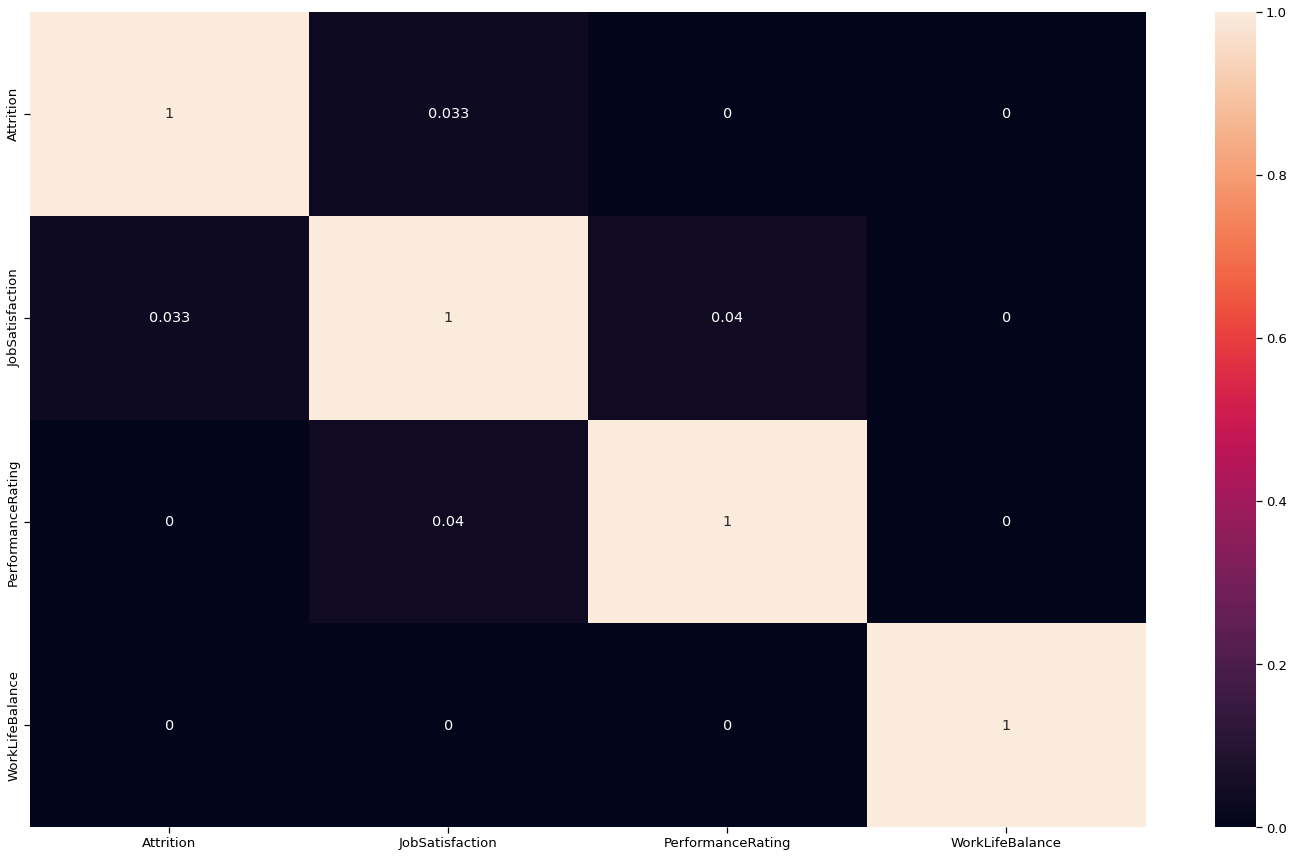

In [18]:
# Setting figure size
fig = plt.figure(figsize = (25, 15))
# Sets heatmap plot
sns.heatmap(new_df.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True)

Based on the heatmap above, `PerformanceRating` and `JobSatisfaction` have no significant effect on `Attrition`.

## 5.4 Are those with low incomes more likely to Attrition?

## 5.5 Does work life balance affect the level of attrition?

interval columns not set, guessing: ['Attrition', 'JobSatisfaction', 'PerformanceRating', 'WorkLifeBalance']


<AxesSubplot:>

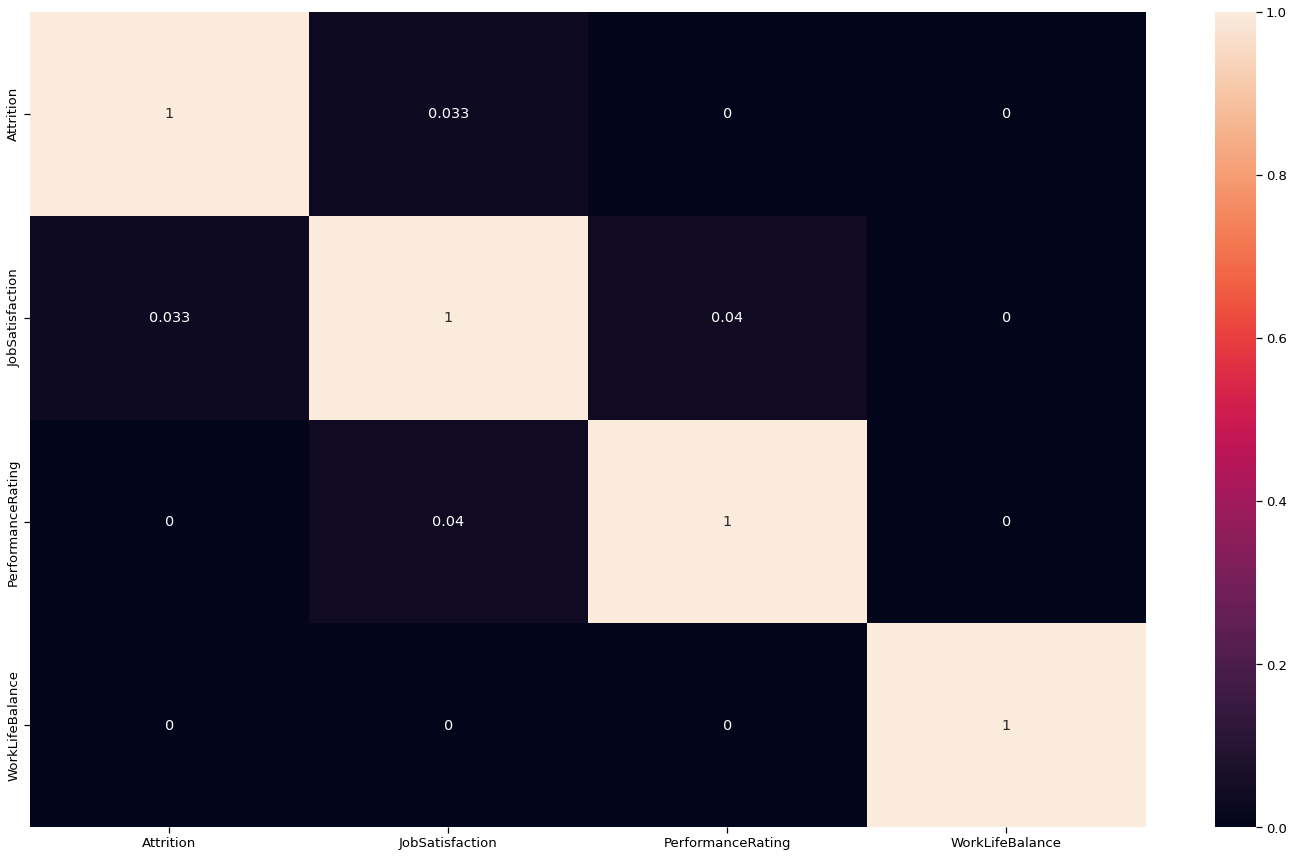

In [19]:
# Setting figure size
fig = plt.figure(figsize = (25, 15))
# Sets heatmap plot
sns.heatmap(new_df.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True)

`WorkLifeBalance` does not affect `Attrition` significantly.

# VI. DATA PREPROCESSING

## 6.1 INFERENCE MODEL

In [20]:
data_clean_inf = df.sample(5, random_state=1)
data_clean_inf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1291,37,0,Travel_Rarely,370,Research & Development,10,4,Medical,1,1809,...,2,80,0,10,4,1,10,3,0,8
1153,18,1,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,3,80,0,0,2,4,0,0,0,0
720,30,1,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,...,2,80,0,7,2,3,5,2,0,1
763,34,1,Travel_Rarely,1333,Sales,10,4,Life Sciences,1,1055,...,4,80,1,1,2,3,1,1,0,0
976,56,1,Travel_Rarely,1369,Research & Development,23,3,Life Sciences,1,1373,...,1,80,1,33,0,3,19,16,15,9


In [21]:
data_clean_inf_final = data_clean_inf.filter(['MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears'], axis=1)
data_clean_inf_target = data_clean_inf['Attrition']
data_clean_inf_final

,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears
1291,4213,0,0,10
1153,1569,1,0,0
720,2132,1,0,7
763,2220,1,1,1
976,13402,1,1,33


In [22]:
df = df.drop(data_clean_inf.index)

In [23]:
df.reset_index(drop=True, inplace=True) 
data_clean_inf.reset_index(drop=True, inplace=True)

## 6.2 DATA SPLITTING

In [24]:
X = df.drop(columns='Attrition', axis=1)
y = df['Attrition']
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1461,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1462,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1463,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [25]:
train, test = train_test_split(df, test_size=0.2, stratify=y, random_state=1)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (1172, 35)
Test size:  (293, 35)


## 6.3 FEATURE SELECTION

interval columns not set, guessing: ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable EmployeeCount for analysis 1. Dropping this column
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable StandardHours for analysis 1. Dropping this column
  warnings.warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable Over18 for analysis 1. Dropping this column
  warnings.warn(


<AxesSubplot:>

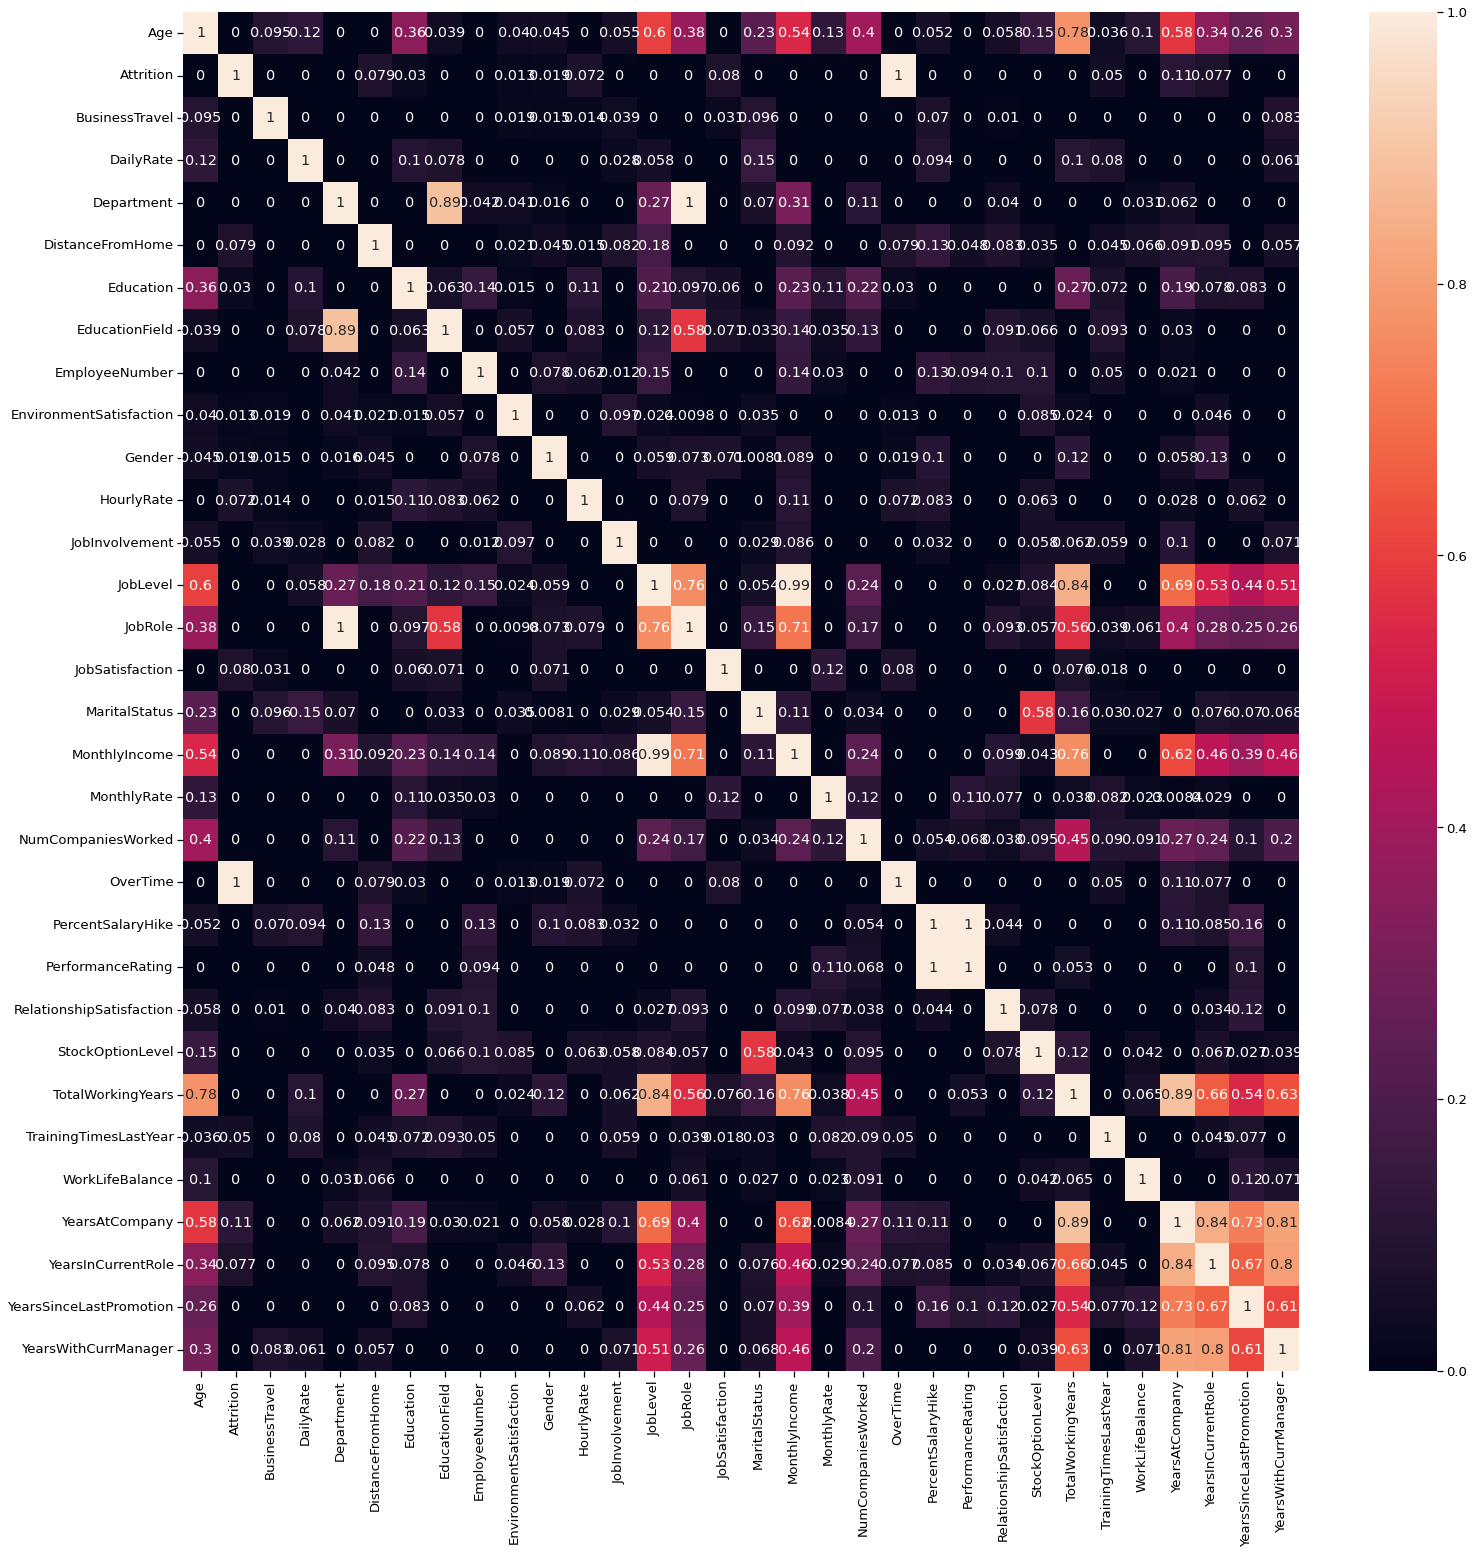

In [26]:
# Setting figure size
fig = plt.figure(figsize = (25, 25))
# Sets heatmap plot
sns.heatmap(train.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True)

Based on the heatmap above, the features that will I am going to use for making the model are:

- MonthlyIncome
- OverTime
- StockOptionLevel
- TotalWorkingYears

## 6.4 DROPPING UNUSED FEATURES

In [27]:
train = train.filter(['Attrition', 'MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears'], axis=1)
train

,Attrition,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears
938,0,3904,0,0,6
1018,0,4400,0,0,6
377,0,2543,0,1,6
894,0,6812,0,0,10
644,1,2356,1,1,8
...,...,...,...,...,...
1084,1,2308,1,1,12
111,1,6074,1,0,9
740,0,18303,0,0,21
251,0,10938,0,0,20


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1172 entries, 938 to 1258
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Attrition          1172 non-null   int64
 1   MonthlyIncome      1172 non-null   int64
 2   OverTime           1172 non-null   int64
 3   StockOptionLevel   1172 non-null   int64
 4   TotalWorkingYears  1172 non-null   int64
dtypes: int64(5)
memory usage: 54.9 KB


In [29]:
test = test.filter(['Attrition', 'MonthlyIncome','OverTime','StockOptionLevel','TotalWorkingYears'], axis=1)
test

,Attrition,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears
1208,0,2929,0,0,10
556,0,2450,0,0,19
92,1,5209,1,3,11
1398,0,13341,0,0,21
560,0,5121,0,1,7
...,...,...,...,...,...
215,1,13591,1,0,16
1053,0,2909,0,1,5
853,0,6474,0,1,14
1388,0,4105,0,0,7


## 6.6 SPLITTING TRAIN AND TEST DATA

In [30]:
X_train = train.drop(columns='Attrition')
y_train = train['Attrition']

X_test = test.drop(columns='Attrition')
y_test = test['Attrition']

In [31]:
X_train

,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears
938,3904,0,0,6
1018,4400,0,0,6
377,2543,0,1,6
894,6812,0,0,10
644,2356,1,1,8
...,...,...,...,...
1084,2308,1,1,12
111,6074,1,0,9
740,18303,0,0,21
251,10938,0,0,20


In [32]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1172 entries, 938 to 1258
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1172 non-null   int64
dtypes: int64(1)
memory usage: 18.3 KB


## 6.7 SCALING TRAIN AND TEST DATA

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[0.15244866, 0.        , 0.        , 0.15      ],
       [0.17856767, 0.        , 0.        , 0.15      ],
       [0.08077936, 0.        , 0.33333333, 0.15      ],
       ...,
       [0.91068984, 0.        , 0.        , 0.525     ],
       [0.52285413, 0.        , 0.        , 0.5       ],
       [0.07519747, 1.        , 0.33333333, 0.15      ]])

In [34]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# VII. MODEL DEFINITION

In [35]:
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100)

# VIII. MODEL TRAINING

In [36]:
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

# IX. MODEL EVALUATION

## 9.1 DTC EVAL

In [37]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    842.0  330.0       1.0     1172.0        1172.0
_______________________________________________
Confusion Matrix: 
 [[842   0]
 [  0 330]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    211.0  82.0       1.0      293.0         293.0
_______________________________________________
Confusion Matrix: 
 [[211   0]
 [  0  82]]



### 9.1.1 DTC HYPERPARAMETER TUNING

In [38]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    842.0  330.0       1.0     1172.0        1172.0
_______________________________________________
Confusion Matrix: 
 [[842   0]
 [  0 330]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0  

## 9.2 RFC EVAL

In [39]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    842.0  330.0       1.0     1172.0        1172.0
_______________________________________________
Confusion Matrix: 
 [[842   0]
 [  0 330]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    211.0  82.0       1.0      293.0         293.0
_______________________________________________
Confusion Matrix: 
 [[211   0]
 [  0  82]]



### 9.2.1 RFC HYPERPARAMETER TUNING

#### 9.2.1.1 Randomized Search Cross Validation

In [40]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    842.0  330.0       1.0     1172.0        1172.0
_______________________________________________
Confusion Matrix: 
 [[842   0]
 [  0 330]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     

#### 9.2.1.2 Grid Search Cross Validation

In [41]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    842.0  330.0       1.0     1172.0        1172.0
_______________________________________________
Confusion Matrix: 
 [[842   0]
 [  0 330]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    211.0  8

# X. MODEL INFERENCE

# XI. CONCLUSION